<a href="https://colab.research.google.com/github/Aranzasuu/ADA-Informes/blob/main/Algoritmo_Kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **CONCEPTOS BASE**

### **1. Grafos**

↪ Los grafos son un conjunto de nodos y aristas conectados entre sí. 
Consiste en un TDA, compuesto de nodos (también llamados vértices) y un conjunto de arcos (aristas) que establecen relaciones entre los nodos.

> ![image](https://i.imgur.com/sODJ76l.png)

\\

### **2. Árbol recubridor**

↪ Un árbol de expansión es un subconjunto de un grafo conexo G, donde todas las aristas están conectadas y no debe tener ningún ciclo. La imagen de la izquierda corresponde

> ![image](https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Connexe_et_pas_connexe.svg/400px-Connexe_et_pas_connexe.svg.png)

\\

### Entonces, ¿Qué es un **árbol recubridor mínimo**?

↪ Una propiedad que interesa conocer de los grafos es si para todo par de vértices hay un camino que los una. Si el grafo cumple con esta propiedad podemos decir que el grafo es conexo.

> ### **¿Qué es un árbol?**
>
> Un árbol, en una red, es un subconjunto G’ del grafo G que está conectado y sin ciclos. Los árboles tienen dos propiedades importantes:
- Todo árbol de $n$ vértices contiene exactamente $n - 1$ aristas.
- Si se añade una arista a un árbol, se obtiene un ciclo.
- El objetivo de este árbol consiste en buscar un árbol que abarque todos los vértices del grafo y que la suma de las aristas sea mínima.

---




# **1. PROBLEMA DE OPTIMIZACIÓN**

> **↪ PROBLEMA:** El problema consiste en encontrar una solución utilizando el árbol recubridor mínimo, es decir que dado un grafo convexo G = (V, A) no dirigido y ponderado con pesos positivos, calcular un subgrafo conexo T ⊆ G conecte todos los vértices del grafo G y que la **suma** de los pesos de las aristas seleccionadas sea **mínima**.
>
> **↪ SOLUCIÓN:** Este subgrafo es necesariamente un árbol: árbol generador minimal o árbol de recubrimiento mínimo.

El árbol recubridor es un subconjunto $T$ del grafo que debe satisfacer estas propiedades:

- T no debe contener ningún ciclo
- Por cada par $(w,v)$ de vértices debe existir un camino entre $v$ y $w$.
- Un árbol recubridor de $n$ nodos tiene $n - 1$ arcos.

\\

**APLICACIONES**
1. Diseño de redes telefónicas.
2. Problema del viajante de comercio.
3. Construcción de una red ferroviaria.

#**2. ALGORITMO KRUSKAL**

> **↪ ENTRADA:** Grafo conectado no dirigido G = (V,E) y un costo real $c_e$ para cada arco e en E.
>
> **↪ SALIDA:** Un árbol recubridor T en E de G con el mínimo coste $sum$(e en T) $ c_e$.

\\

Kruskal creó un algoritmo para encontrar un árbol recubridor mínimo en un grafo ponderado y convexo. Este algoritmo de la teoría de grafos busca un subconjunto de aristas que incluyen todos los vértices formando un árbol y donde todos los valores de las aristas de este son mínimas. Si el grafo no es convexo, busca un bosque de expandido mínimo. Este algoritmo es un ejemplo de algoritmo voraz que funciona de la siguiente manera:

- Se crea un bosque B (conjunto de árboles), donde cada vértice del grafo es un árbol separado
- Se crea un conjunto C que contenga a todas las aristas del grafo
- Mientras C es no vacío:
  - Eliminar una arista de peso mínimo de C.
  - Si esa arista conecta dos árboles diferentes se añade al bosque, combinando los dos árboles en un solo árbol.
  - En caso contrario, se desecha la arista.

\\

Al acabar el algoritmo, el bosque tiene un solo componente, el cual forma un árbol de expansión mínimo del grafo.

En un árbol de expansión mínimo se cumple que la cantidad de aristas del árbol es la cantidad de nodos – 1.

\\

## **Subestructura Óptima**
Un árbol óptimo contiene subárboles óptimos. Sea **T** un árbol recubridor mínimo de **G = (V,E)**. Al remover un arco **(u,v)** en **T** particiona en dos árboles **T1** y **T2**. Entonces **T1** es un árbol recubridor mínimo de **G1 = (V1,E1)** y **T2** es de **G2 = (V2,E2)**.

Dado esto, la suma de costos corresponde a:

$$ w(t)= w(T1) + w(T2) + w(w,v)$$

\\

## **Procedimiento del algoritmo**

- Ordenar en forma ascendente según el peso de cada arista
- Se marca la arista con menor peso como la arista inicial de la ruta mínima (en caso de empate elija una arbitrariamente)
- De las aristas restantes, se selecciona la que tenga menor peso, si hay más de una, se elige cualquiera de ellas.
- Repetir el paso 3 siempre que la arista elegida no forme un ciclo con las ya seleccionadas
- El proceso termina cuando tenemos todos los nodos del grafo en alguna de las aristas marcadas, es decir, cuando tenemos seleccionadas n-1 aristas, siendo n el número de nodos o vértices del grafo.

## **2.1 CÓDIGO**

Este algoritmo corresponde a la implementación utilizando la estructura de datos *union-find* (o también conocido como *conjunto disjunto*) que reduce considerablemente el tiempo de ejecución del algoritmo.

\\
## **Operaciones**

**1.** ***find(i)*** ⇒ Dado un elemento $i$ retorna el elemento representativos del conjunto que contiene a $i$, si no lo encuentra vuelve a buscar ya que es recursiva. ⇒ O(log n)

**2.** ***union(a,b)*** ⇒ Une los conjuntos dinámicos que contienen a $a$ y $b$. Se destruyen los conjuntos que los contengan previamente. ⇒ O(log n)

In [5]:
# IMPORTACIÓN DE LAS LIBRERIAS A UTILIZAR

import networkx as nx
import matplotlib.pyplot as plt
import random
import math
import datetime
import seaborn as sns
from timeit import repeat
import numpy as np
from termcolor import colored

In [6]:
# GENERADOR DE GRAFOS

# Crea un grafo de tipo array de arrays
# que contiene [i, j, peso]
# siendo i y j los nodos conectados

def graph_instance_creator(V):
  graph = []
  for i in range(V):
    for j in range(i+1, V):
      graph.append([i, j, random.randint(1, 500)])
  
  return graph

# GRAFO A MODO NETWORKX

# Recibe un grafo de tipo array
# Retorna un nx.Graph de la libreria networkx

def graph_to_nxgraph(graph):
  nxgraph = nx.Graph()
  for i in graph:
    nxgraph.add_edge(i[0], i[1], weight=i[2])
  return nxgraph

In [7]:
def find(parent, i):
  if parent[i] == i: # si es igual, retorna el conjunto
    return i
  else:
    return find(parent, parent[i])  # recursión para seguir buscando

def union(parent, x, y):
  parent[x] = y  # Se unen los dos subárboles


def kruskalMST(G, visualize):
  A = [] # variable auxiliar que contiene al árbol recubridor
  i = 0 # índice auxiliar para poder recorrer el grafo

  G = sorted(G, key = lambda nodo: nodo[2]) # Ordenamos el grafo de menor a mayor
  parent = [] # auxiliar para recorrer cada subárbol

  for node in range(len(G)):
    parent.append(node)

  # Recorremos cada una de las conexiones
  while i < len(G) - 1:
    u, v, w = G[i]
    i += 1
    # Buscamos los padres de cada nodo y se verifica que no se genere un ciclo
    x = find(parent, u)
    y = find(parent, v)
    
    # Si no es cíclico, se agrega a nuestra variable T
    if (x != y):
      A.append([u,v,w])
      union(parent, x, y)

  # Calculamos el coste mínimo del árbol recubridor mínimo
  cost = 0 
  for arco in A:
     cost += arco[2]

  # Para visualizar el grafo
  if visualize == True:
    A_to_networkx = graph_to_nxgraph(A)
    pos = nx.spring_layout(A_to_networkx)
    labels = nx.get_edge_attributes(A_to_networkx,'weight')
    nx.draw_networkx_edge_labels(A_to_networkx,pos,edge_labels=labels,font_size=10)
    nx.draw(A_to_networkx, pos, with_labels = True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

  return A, cost

#Ejemplo
n = random.randint(4,8)
G = graph_instance_creator(n)

print("Grafo original >>", G)
print("Total de nodos >>", n)
print("Total de vertices >>", len(G))

A, coste = kruskalMST(G, visualize = False)
print("\nÁrbol mínimo recubridor >>", A)
print("Total de nodos >>", len(A) + 1)
print("Cantidad de vertices >>", len(A))
print("\n\nCosto final >>", coste)

Grafo original >> [[0, 1, 64], [0, 2, 195], [0, 3, 476], [0, 4, 89], [0, 5, 308], [0, 6, 41], [1, 2, 139], [1, 3, 473], [1, 4, 264], [1, 5, 200], [1, 6, 224], [2, 3, 177], [2, 4, 105], [2, 5, 408], [2, 6, 395], [3, 4, 322], [3, 5, 328], [3, 6, 151], [4, 5, 270], [4, 6, 107], [5, 6, 127]]
Total de nodos >> 7
Total de vertices >> 21

Árbol mínimo recubridor >> [[0, 6, 41], [0, 1, 64], [0, 4, 89], [2, 4, 105], [5, 6, 127], [3, 6, 151]]
Total de nodos >> 7
Cantidad de vertices >> 6


Costo final >> 577


## **2.2 Visualización árbol**

Grafo original >> [[0, 1, 349], [0, 2, 14], [0, 3, 57], [0, 4, 141], [0, 5, 305], [1, 2, 307], [1, 3, 488], [1, 4, 173], [1, 5, 293], [2, 3, 325], [2, 4, 259], [2, 5, 500], [3, 4, 70], [3, 5, 255], [4, 5, 257]] 

Árbol mínimo recubridor encontrado >> [[0, 2, 14], [0, 3, 57], [3, 4, 70], [1, 4, 173], [3, 5, 255]] 



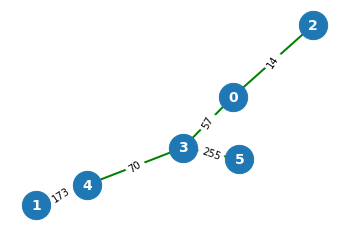

In [8]:
n = random.randint(4,10)
G = graph_instance_creator(n)
print("Grafo original >>",G,"\n")
A, c = kruskalMST(G, visualize = True)
print("Árbol mínimo recubridor encontrado >>", A,"\n")

## **2.3 EJEMPLO**

↪ Para entender de mejor manera el funcionamiento del algoritmo, veremos un pequeño ejemplo paso a paso.

↪ Este es el grafo original. Los números de las aristas indican su peso. Ninguna de las aristas está resaltada.

**COLORES**
- Línea roja: parte de la solución.
- Línea azul: solución subproblema.
- Línea naranja: se descarta.

> ![image](https://i.imgur.com/aDt8tpm.png)

**↪ AD** y **CE** son las aristas más cortas y no forman ciclos, con peso 5, cómo se dijo anteriormente si existen 2 con la misma cantidad, se escoge una arbitrariamente, por lo que resaltamos **AD**.

> ![image](https://i.imgur.com/MEYBA0R.png)

**↪** Repetimos el mismo proceso anterior, escogiendo **CE** ya que es la arista más pequeña y no se forma un ciclo, por lo que se resalta como segunda arista.

> ![image](https://i.imgur.com/v9ix1ov.png)

**↪** La siguiente arista a escoger es **DF**, con peso 6, se resalta utilizando el mismo método.

> ![image](https://i.imgur.com/S3GylI5.png)

**↪** Las siguientes aristas más pequeñas son **AB** y **BE**, ambas con peso 7. **AB** se elige arbitrariamente y se resalta. La arista **BD** se resalta en naranjo, ya que este formaría el ciclo **ABD** si se hubiera elegido.

> ![image](https://i.imgur.com/Z1gci6e.png)

**↪** El proceso continúa marcando las aristas, **BE** con peso 7. Muchas otra aristas se marcan con naranjo en este paso: **BC** (formando el ciclo **BCE**), **DE** (formando el ciclo **DEBA**), y **FE** (formando el ciclo **FEBAD**).

> ![image](https://i.imgur.com/jvnonGQ.png)

**↪** Finalmente, el proceso termina con la arista **EG** de peso 9, y se ha encontrado el árbol expandido mínimo con peso total de **39**.

> ![image](https://i.imgur.com/PQGgSaN.png)

# **3. CORRECTITUD**

↪ Sea $G$ un grafo ponderado conectado. Sea $H$ $=$ $T_m$ el subgrafo producido por el algoritmo. Por construcción es claro que $T_0$, $T_1$, $...$,$T_m$ $=$ $H$ son todos acíclicos: Por lo tanto $H$ es bosque.

\\

### **Afirmación**: 

$H$ está conectado. Probaremos esto usando el argumento de la contradicción.

↪ Suponga que $H$ es desconectado. Entonces hay al menos dos árboles desconectados en el bosque $H$. Como $G$ está conectado, hay una secuencia de aristas $e_1$, $e_2$,$...$,$e_n$ $\notin$ $H$ = $T_m$ que conectan los vértices de un par de árboles desconectados en el bosque. Entonces $T_m$ $\cup$ {$e_1$} es acíclico, lo cual es una contradicción ya que el algoritmo no se detendría en $i$$=$$m$.

Entonces $H$ es un árbol de expansión de $G$. Basta mostrar que es mínimo.

Probamos lo siguiente por **inducción**: si $F$ es el conjunto de aristas elegido en cualquier etapa del algoritmo, entonces hay un árbol de expansión mínimo que contiene $F$.

\\

> **Nota:** Esta prueba por inducción completa la prueba de corrección ya que en algún momento $F$ es $H$.

\\

### **Caso Base:** 

↪ Claramente, la proposición es verdadera si $F$ está vacía: cualquier árbol de expansión mínimo servirá.

### **Caso Inductivo:**

↪ Ahora suponga que $F$ contiene $n$ $\geq$ $0$ aristas y la proposición es verdadera. Sea $T$ $=$ $(V,E)$ un árbol de expansión mínimo que contiene $F$.

↪ Si $E$ $=$ $F$ entonces hemos terminado. Así que suponga que $F$ $\subset$ $E$ y, por lo tanto, el algoritmo no está terminado. Necesitamos mostrar que cuando el algoritmo agrega otra arista $e$ a $F$, hay un árbol de expansión mínimo que contiene $F$ $\cup$ {$e$}.

↪ Si la siguiente arista $e$ agregada por el algoritmo está en $E$, entonces la proposición es verdadera para $F$ $\cup$ {$e$} y estaríamos listos por inducción.

↪ De lo contrario, hay un ciclo $C$ en $T$ $\cup$ {$e$}, el nuevo borde agregado entre los vértices de un árbol crea un ciclo, además, hay otra arista $e'$ $\in$ $C$ tal que $e'$ no está en $F$, ya que $F$ $\cup$ {$e$} debe ser acíclico, dado que $e'$ no fue elegido por el algoritmo, $peso(e')$ $\geq$ $peso(e)$.

↪ Entonces $T'$ $=$ ($V$, ($E$ $\setminus${$e'$}) $\cup$ {$e$}) es un árbol de expansión. La suma de los pesos en $T'$ es la suma de los pesos en $T$ más $(peso(e) - peso(e'))$ $\leq$ $0$.

↪ Entonces $T'$ tiene una suma de pesos que es menor o igual que la suma de pesos en $T$. Pero $T$ tiene un peso mínimo; entonces $T'$ es un $MST$. Entonces terminamos por inducción ya que $T'$ es un árbol de expansión mínimo que contiene $F$ $\cup$ {$e$}.

# **4. TIEMPO DE EJECUCIÓN**

Podemos separar el algoritmo en *implementación directa* y *con la estructura de datos Union-Find*

\\

**1. Implementación directa**

En primer lugar, el algoritmo ordena los arcos de forma decreciente según su costo asociado, esta operación tiene un costo de **O(E log V)**, siendo E el número de arcos y V el de nodos.

Para el loop que agrega arcos a nuestra solución:

- El ciclo realiza E iteraciones. Cada iteración es responsable de revisar si el arco $e = (u,v)$ puede ser agregado a la solución y que tenemo hasta el momento (no tiene un ciclo).

- La agregación de un arco $e$ solamente crea un ciclo si **ya existe un camino de u a v**. Esta operación puede ser realizada en tiempo lineal usando cualquier algoritmo de búsqueda en grafos empezando desde **v**. Al existir **V** nodos a considerar en este análisis, dentro del ciclo tenemos un aporte de O(V).

Por lo tanto, el tiempo de ejecución del algoritmo implementado de forma directa es de **O(VE)**.

\\

**2. Implementación Union-Find**

En esta implementación se analiza paso a paso el procedimiento para determinar el tiempo de ejecución:

$$T_{sort}(E) + O(V) * T_{Make-Set} + O(E)(T_{Find} + T_{Union}) = O(Elog(E)+E_α(V))$$

Análisis del tiempo de ejecución del algoritmo:

- La ordenación de las aristas lleva tiempo **O(E log(E))**
- Tras la ordenación, iteramos por todas las aristas E y aplicamos el algoritmo de union-find.
- Las operaciones de búsqueda y unión pueden tardar como máximo **O(log(V)).
- Por lo tanto, la complejidad total es de **O(Elog(E) + Elog(V))**.
- El valor de E puede ser como máximo O(2V), por lo que O(log(V)) es O(log(E)) igual. 

Por lo tanto, la complejidad temporal global de la implementación union-find es **O(Elog(E)) u O(Elog(V))**.

# **5. EXPERIMENTACIÓN**

## **5.1 Tiempo de ejecución algoritmo Krukal**

↪ En el siguiente experimento, analizaremos el tiempo de ejecución del algoritmo de kruskal a medida que aumentan la cantidad de nodos en un rango de $[5,100]$.

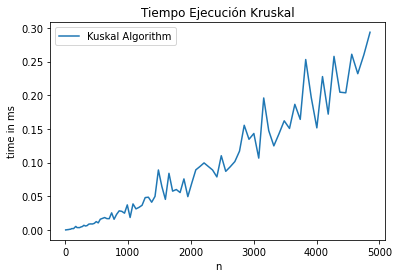

In [12]:
x=[]; y =[]

#sns.set(rc={'figure.figsize':(12,8)})

for j in range(5,100):

  G = graph_instance_creator(j)
  n = len(G)

  l = repeat(setup="from __main__ import kruskalMST", stmt=f"kruskalMST({G},{False})", repeat=1, number=10)
  x.append(n)
  y.append(l)

plt.plot(x,y)
plt.legend(["Kuskal Algorithm"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title('Tiempo Ejecución Kruskal')
plt.show()

### **CONCLUSIÓN**

↪ Como podemos observar en el gráfico, la curva se comporta de forma logarítmica y creciente, por lo que nuestro análisis del tiempo de ejecución en el punto 4 es correcta.

## **5.2 Comparación v/s algoritmo Prim**

↪ En el siguiente experimento realizaremos una comparativa entre el algoritmo kruskal y el algoritmo prim, tomando en cuenta la característica del tiempo de ejecución.

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
from collections import defaultdict

class Prim:
    def __init__(self, nodes, edges) -> None:
        self.nodes = nodes
        self.edges = edges
    
    def mst(self, start_node):
        num_nodes = len(self.nodes)
        mst_edges = defaultdict(int)
        edge_weight = defaultdict(int) 
        node_neighbors = defaultdict(set) 
        visited = set()  
        visited.add(start_node)
        count = 1 

        for (u, v, w) in self.edges:
            node_neighbors[u].add(v)
            node_neighbors[v].add(u)
            edge_weight[(u, v)] = edge_weight[(v, u)] = w
            
        while count != num_nodes:
            min_weight = sys.maxsize
            cur_node, next_node = None, None
            for u in visited:
                for v in node_neighbors[u]:
                    if v not in visited and edge_weight[(u, v)] < min_weight:
                        min_weight = edge_weight[(u, v)]
                        cur_node = u
                        next_node = v     
            visited.add(next_node)
            count += 1
            if cur_node != None and next_node != None:
                mst_edges[(cur_node, next_node)] = min_weight
        return mst_edges

nodes = [0, 1, 2, 3, 4, 5]
edges = [(0, 1, 6), (0, 2, 1), (0, 3, 5), (1, 2, 5), (1, 4, 3), (2, 3, 5), (2, 4, 6), (2, 5, 4), (3, 5, 2), (4, 5, 6)]
start_node = 0 
mst_edges = Prim(nodes, edges).mst(start_node)
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

In [ ]:
x=[]; y =[]; z = []

for j in range(5,100):

  G = graph_instance_creator(j)
  n = len(G)

  l = repeat(setup="from __main__ import kruskalMST", stmt=f"kruskalMST({G},{False})", repeat=1, number=10)
  m = repeat(setup="from __main__ import Prim", stmt=f"Prim({G},{False})", repeat=1, number=10)

  x.append(n)
  y.append(l)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Kuskal Algorithm", "Prim Algorithm"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title('Tiempo Ejecución Kruskal v/s Prim')
plt.show()

### **CONCLUSIÓN**

↪

Algunas de las diferencias entre el algoritmo de Prim y el Kruskal son:

1. Prim → Comienza a construir MST desde cualquier vértices del gráfico
  
  Kruskal → Comienza a construir a partir del vértice que tiene el peso mínimo en el gráfico.

2. Prim → Atraviesa un nodo más de una vez para obtener la distancia mínima.

  Kruskal → Atraviesa un nodo sólo una vez.

3. Prim → El algoritmo de Prim tiene una complejidad de tiempo de O(V2), siendo V el número de vértices y se puede mejorar hasta O(E log V) usando montones de Fibonacci.

  Kruskal → La complejidad temporal del algoritmo de Kruskal es O(E log V), siendo V el número de vértices.

4. Prim → El algoritmo de Prim proporciona un componente conectado y funciona solo en un gráfico conectado.

  Kruskal → El algoritmo de Kruskal puede generar bosques (componentes desconectados) en cualquier instante y puede funcionar en componentes desconectados.

5. Prim → El algoritmo de Prim se ejecuta más rápido en gráficos densos.

  Kruskal → El algoritmo de Kruskal se ejecuta más rápido en gráficos dispersos.

6. Prim → Genera el árbol de expansión mínimo a partir del vértice raíz.

  Kruskal → Genera el árbol de expansión mínimo a partir del borde menos ponderado.

7. Prim → Las aplicaciones del algoritmo de prim son el problema del vendedor ambulante, la red de carreteras y las vías férreas que conectan todas las ciudades, etc.

  Kruskal → as aplicaciones del algoritmo Kruskal son la conexión LAN, la red de TV, etc.

8. Prim → El algoritmo de Prim prefiere estructuras de datos de lista.

  Kruskal → El algoritmo de Kruskal prefiere estructuras de datos en heap.


